# DES algorithm
In this file we have a complete description of the DES algorithm.

Take a look at https://github.com/0x10001/des/tree/master/des to see a more optimized Python implementation.

In [1]:
#Setup
INITIAL_PERMUTATION = [
    57, 49, 41, 33, 25, 17, 9,  1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7,
    56, 48, 40, 32, 24, 16, 8,  0,
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
]
G = SymmetricGroup(range(0,64))
IPperm=PermutationGroupElement(INITIAL_PERMUTATION,G)

INVERSE_PERMUTATION=[(IPperm**(-1))(i) for i in range(0,64)]

def IP(data):
    return [data[INITIAL_PERMUTATION[k]] for k in range(0,64)]
def IPinv(data):
    return [data[INVERSE_PERMUTATION[k]] for k in range(0,64)]

EXPANSION =[
    31, 0,  1,  2,  3,  4,
    3,  4,  5,  6,  7,  8,
    7,  8,  9,  10, 11, 12,
    11, 12, 13, 14, 15, 16,
    15, 16, 17, 18, 19, 20,
    19, 20, 21, 22, 23, 24,
    23, 24, 25, 26, 27, 28,
    27, 28, 29, 30, 31, 0,
    ]
def Expansion(data):
    return [data[EXPANSION[k]] for k in range(0,48)]
    
PERMUTATION_P = [
    15, 6,  19, 20, 28, 11, 27, 16,
    0,  14, 22, 25, 4,  17, 30, 9,
    1,  7,  23, 13, 31, 26, 2,  8,
    18, 12, 29, 5,  21, 10, 3,  24]

def PermuteP(R):
    return [R[PERMUTATION_P[k]] for k in range(0,32)]

In [2]:
IPperm

(0,57,54,12,27,39)(1,49,52,28,31,7)(2,41,50,44,26,47)(3,33,48,60,30,15)(4,25,55)(5,17,53,20,29,23)(6,9,51,36,24,63)(8,59,38)(10,43,34,40,58,46)(11,35,32,56,62,14)(13,19,37,16,61,22)(18,45)

Helper functions used in rounds.

In [3]:
def Split(data):
    return data[:32],data[32:]

def Unsplit(L,R):
    return L+R

def BSplit(data):
    return [data[6*i:6*i+6] for i in range(0,8)]
    
def ListXOR(li1,li2):
    return [li1[i]^^li2[i] for i in range(0,len(li1))]

## Heart of the algorithm - the SBox function
SBox function is a nonlinear part of the DES algorithm which uses a nonlinear transform of a collection of 6 bits into four bits. We use six different SBox type subsitutions in DES.

In [4]:

SUBSTITUTION_BOX = [
    [
        [14, 4,  13, 1,  2,  15, 11, 8,  3,  10, 6,  12, 5,  9,  0,  7],
        [0,  15, 7,  4,  14, 2,  13, 1,  10, 6,  12, 11, 9,  5,  3,  8],
        [4,  1,  14, 8,  13, 6,  2,  11, 15, 12, 9,  7,  3,  10, 5,  0],
        [15, 12, 8,  2,  4,  9,  1,  7,  5,  11, 3,  14, 10, 0,  6,  13],
    ],
    [
        [15, 1,  8,  14, 6,  11, 3,  4,  9,  7,  2,  13, 12, 0,  5,  10],
        [3,  13, 4,  7,  15, 2,  8,  14, 12, 0,  1,  10, 6,  9,  11, 5],
        [0,  14, 7,  11, 10, 4,  13, 1,  5,  8,  12, 6,  9,  3,  2,  15],
        [13, 8,  10, 1,  3,  15, 4,  2,  11, 6,  7,  12, 0,  5,  14, 9],
    ],
    [
        [10, 0,  9,  14, 6,  3,  15, 5,  1,  13, 12, 7,  11, 4,  2,  8],
        [13, 7,  0,  9,  3,  4,  6,  10, 2,  8,  5,  14, 12, 11, 15, 1],
        [13, 6,  4,  9,  8,  15, 3,  0,  11, 1,  2,  12, 5,  10, 14, 7],
        [1,  10, 13, 0,  6,  9,  8,  7,  4,  15, 14, 3,  11, 5,  2,  12],
    ],
    [
        [7,  13, 14, 3,  0,  6,  9,  10, 1,  2,  8,  5,  11, 12, 4,  15],
        [13, 8,  11, 5,  6,  15, 0,  3,  4,  7,  2,  12, 1,  10, 14, 9],
        [10, 6,  9,  0,  12, 11, 7,  13, 15, 1,  3,  14, 5,  2,  8,  4],
        [3,  15, 0,  6,  10, 1,  13, 8,  9,  4,  5,  11, 12, 7,  2,  14],
    ],
    [
        [2,  12, 4,  1,  7,  10, 11, 6,  8,  5,  3,  15, 13, 0,  14, 9],
        [14, 11, 2,  12, 4,  7,  13, 1,  5,  0,  15, 10, 3,  9,  8,  6],
        [4,  2,  1,  11, 10, 13, 7,  8,  15, 9,  12, 5,  6,  3,  0,  14],
        [11, 8,  12, 7,  1,  14, 2,  13, 6,  15, 0,  9,  10, 4,  5,  3],
    ],
    [
        [12, 1,  10, 15, 9,  2,  6,  8,  0,  13, 3,  4,  14, 7,  5,  11],
        [10, 15, 4,  2,  7,  12, 9,  5,  6,  1,  13, 14, 0,  11, 3,  8],
        [9,  14, 15, 5,  2,  8,  12, 3,  7,  0,  4,  10, 1,  13, 11, 6],
        [4,  3,  2,  12, 9,  5,  15, 10, 11, 14, 1,  7,  6,  0,  8,  13],
    ],
    [
        [4,  11,  2, 14, 15, 0,  8,  13, 3,  12, 9,  7,  5,  10, 6,  1],
        [13, 0,  11, 7,  4,  9,  1,  10, 14, 3,  5,  12, 2,  15, 8,  6],
        [1,  4,  11, 13, 12, 3,  7,  14, 10, 15, 6,  8,  0,  5,  9,  2],
        [6,  11, 13, 8,  1,  4,  10, 7,  9,  5,  0,  15, 14, 2,  3,  12],
    ],
    [
        [13, 2,  8,  4,  6,  15, 11, 1,  10, 9,  3,  14, 5,  0,  12, 7],
        [1,  15, 13, 8,  10, 3,  7,  4,  12, 5,  6,  11, 0,  14, 9,  2],
        [7,  11, 4,  1,  9,  12, 14, 2,  0,  6,  10, 13, 15, 3,  5,  8],
        [2,  1,  14, 7,  4,  10, 8,  13, 15, 12, 9,  0,  3,  5,  6,  11],
    ],
]

def SBox(data48):
    Blist=BSplit(data48)
    Sout=[]
    for i in range(0,8):
        B=Blist[i]
        S=SUBSTITUTION_BOX[i] 
        b0,b1,b2,b3,b4,b5=B
        r=2*b0+b5 #wybór wiersza
        c=8*b1+4*b2+2*b3+b4 #wybór kolumny
        Sout+=S[r][c].digits(base=2,padto=4)[::-1] #wyrównanie do 4 bitów
    return Sout

## Feistela function - source of key mixing in DES
Feistel function is a composition of SBox functions with XOR which applies to the right (R) part of data combined with the round key (K). At the end we apply an extra permutation (P).

In [5]:
def FeistelFunction(R,K):
    return PermuteP(SBox(ListXOR(Expansion(R),K)))

## KeySchedule function

KeySchedule function expands the input 64 bit key into a collection of sixteen 48 bit round keys, which are then used in as the input in Feistel function.

In [6]:

#in rounds zeroth, first, eight we shift by 1
ROTATES = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]

PERMUTED_CHOICE1 = [
    56, 48, 40, 32, 24, 16, 8,
    0,  57, 49, 41, 33, 25, 17,
    9,  1,  58, 50, 42, 34, 26,
    18, 10, 2,  59, 51, 43, 35,
    62, 54, 46, 38, 30, 22, 14,
    6,  61, 53, 45, 37, 29, 21,
    13, 5,  60, 52, 44, 36, 28,
    20, 12, 4,  27, 19, 11, 3,
]

PERMUTED_CHOICE2 = [
    13, 16, 10, 23, 0,  4,
    2,  27, 14, 5,  20, 9,
    22, 18, 11, 3,  25, 7,
    15, 6,  26, 19, 12, 1,
    40, 51, 30, 36, 46, 54,
    29, 39, 50, 44, 32, 47,
    43, 48, 38, 55, 33, 52,
    45, 41, 49, 35, 28, 31,
]

#cyclic rotation by n positions to the left
def CyclicRot(li,n):
    l=len(li)
    return li[n%l:]+li[:-((l-n)%l)]

def KeySchedule(key):
    '''key has 64 bits; output: 16 keys Ki, each of size 48 bits
    '''
    PC1=[key[el] for el in PERMUTED_CHOICE1]
    C0=PC1[:28]
    D0=PC1[28:]
    Cim1=C0
    Dim1=D0
    Kli=[]
    for i in range(1,17):
        v=ROTATES[i-1]
        Ci=CyclicRot(Cim1,v)
        Di=CyclicRot(Dim1,v)
        CDi=Ci+Di
        PC2=[CDi[el] for el in PERMUTED_CHOICE2]
        Ki=PC2
        Kli.append(Ki)
        Cim1=Ci
        Dim1=Di
    return Kli

## DES encryption
The first and final instruction of DES is a permutation IP and its inverse. They do not affect the security of the protocol and are kept only for historical and compatibility reasons (they are essential from the point of view of a hardware implementation; in the software version it is better to ignore them, however the results will be incompatible with standard DES)

In 16 rounds we add the round keys with the help of a Feistel function.

In [7]:
def DESEncryption(plaintext,key):
    expkey=KeySchedule(key)
    L=[]
    R=[]
    L0,R0=Split(IP(plaintext))
    L.append(L0)
    R.append(R0)
    Lim1=L0
    Rim1=R0
    for i in range(1,17):
        Li=Rim1
        Ki=expkey[i-1]
        Ri=ListXOR(Lim1,FeistelFunction(Rim1,Ki))
        L.append(Li)
        R.append(Ri)
        Lim1=Li
        Rim1=Ri
    return IPinv(Unsplit(Ri,Li))

## DES decryption
In this function we only change the order in which the round keys are given (compared to the original order).

In [8]:
def DESDecryption(cipher,key):
    expkey=KeySchedule(key)
    L=[]
    R=[]
    L0,R0=Split(IP(cipher))
    L.append(L0)
    R.append(R0)
    Lim1=L0
    Rim1=R0
    for i in range(16,0,-1):
        Li=Rim1
        Ki=expkey[i-1]
        Ri=ListXOR(Lim1,FeistelFunction(Rim1,Ki))
        L.append(Li)
        R.append(Ri)
        Lim1=Li
        Rim1=Ri
    return IPinv(Unsplit(Ri,Li))

## Testing on random input
A composition of the encryption with decryption should provide the original `data` sequence in each case.

Every 8th bit in the key is an odd parity bit. So to generate a full key we only need 56 bits of input. The other 8 are generated from the parity.

In [9]:
def GenerateKey(key56input):
    key=[]
    for i in range(0,8):
        genpart=key56input[7*i:7*i+7]
        parity=(sum(genpart)+1)%2 #sum of every 7 bits should be odd
        key+=genpart+[parity]
    
    return key

In [10]:
#testing
for _ in range(0,1000):
    data=[choice([0,1]) for _ in range(0,64)]
    key=GenerateKey([choice([0,1]) for _ in range(0,56)])
    cipher=DESEncryption(data,key)
    plain=DESDecryption(cipher,key)
    assert plain==data

## Exercises

### Exercise 1
Investigate how many rounds of the DES algorithm is enough to see that a single bit of a plain text will affect every bit of the cryptogram.

In [11]:
def DESEncryptionParam(plaintext,key,n=17):
    expkey=KeySchedule(key)
    L=[]
    R=[]
    L0,R0=Split(IP(plaintext))
    L.append(L0)
    R.append(R0)
    Lim1=L0
    Rim1=R0
    for i in range(1,n):
        Li=Rim1
        Ki=expkey[i-1]
        Ri=ListXOR(Lim1,FeistelFunction(Rim1,Ki))
        L.append(Li)
        R.append(Ri)
        Lim1=Li
        Rim1=Ri
    return IPinv(Unsplit(Ri,Li))

def DetectDiff(plain,key,bitchange,n=17):
    cipher1=DESEncryptionParam(plain,key,n)
    plain[bitchange]=1-plain[bitchange]
    cipher2=DESEncryptionParam(plain,key,n)
    return cipher1,cipher2

In [12]:
def ChangeInfluence(pos,r):
    c1,c2=DetectDiff([choice([0,1]) for _ in range(0,64)],GenerateKey([choice([0,1]) for _ in range(0,56)]),pos,r)
    c1c2diff=ListXOR(c1,c2)
    return c1c2diff.count(1)/64.0

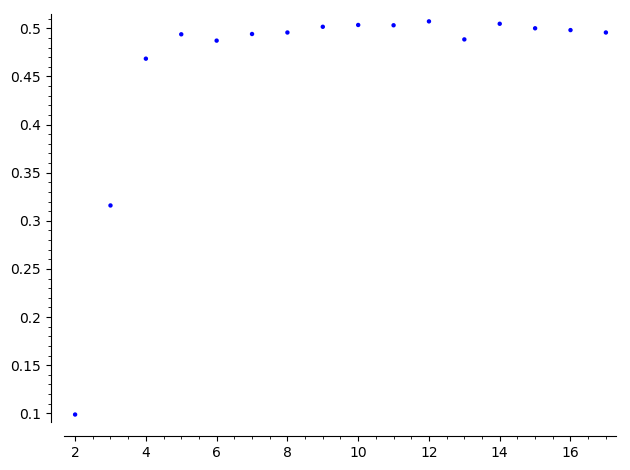

In [13]:
list_plot([(i,sum([ChangeInfluence(0,i) for _ in range(0,50)])/50) for i in range(2,18)])

### Exercise 2
Find all so-called weak keys, i.e. keys such that in each round they generate the same round key.
Answer: (in hexadecimal format)

* 01010101 01010101
* E0E0E0E0 F1F1F1F1
* 1F1F1F1F 0E0E0E0E
* FEFEFEFE FEFEFEFE

Below we explain where does this answer comes from (linear algebra task!).

In [14]:
#Find a system of equations which the 56 free variables must satisfy.
KR=PolynomialRing(GF(2),56,'k')
key=list(KR.gens())
for i in range(1,8): #every 8th bit is the parity (standard)
    key.insert(8*i-1,sum([key[8*i-(j+2)] for j in range(0,7)])+1)
expkey=KeySchedule(key)
vli=[vector(ek) for ek in expkey]
eqs=[]
for i in range(1,16):
    eqs+=list(vli[0]-vli[i])
    
I=KR.ideal(eqs)
bas=I.groebner_basis()
kgens=list(KR.gens())
m=matrix(GF(2),[[b.coefficient(k) for k in kgens] for b in bas])
ker=m.transpose().kernel()
assert ker.dimension()==2 #so we have four keys



Solutions

In [15]:
kerbas=ker.basis()
k1=0*kerbas[0]
k2=kerbas[0]
k3=kerbas[1]
k4=k2+k3

In [1]:
def KeyToHex(key):
    size=len(key)//4
    hlist=[]
    for i in range(0,size):
        kpart=key[4*i:4*i+4]
        hlist.append(hex(int(''.join(map(str,kpart)),base=2))[2:].upper())
    return ''.join(hlist)
def HexToKey(h):
    key=[]
    for hel in h:
        key+=map(int,bin(int(hel,base=16))[2:])
    return key

In [17]:
k=k1
key=GenerateKey(list(k))
print("Initial key")
print(KeyToHex(key))
roundkeys1=KeySchedule(key)
print("\nRound key")
for el in roundkeys1:
    #print(''.join(map(str,el)))
    print(KeyToHex(el))

Initial key
0101010101010101

Round key
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000
000000000000


In [18]:
k=k2
key=GenerateKey(list(k))
print("Initial key")
print(KeyToHex(key))
roundkeys1=KeySchedule(key)
print("\nRound key")
for el in roundkeys1:
    #print(''.join(map(str,el)))
    print(KeyToHex(el))

Initial key
E0E0E0E0F1F1F1F1

Round key
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000
FFFFFF000000


In [19]:
k=k3
key=GenerateKey(list(k))
print("Initial key")
print(KeyToHex(key))
roundkeys1=KeySchedule(key)
print("\nRound key")
for el in roundkeys1:
    #print(''.join(map(str,el)))
    print(KeyToHex(el))

Initial key
1F1F1F1F0E0E0E0E

Round key
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF
000000FFFFFF


In [20]:
k=k4
key=GenerateKey(list(k))
print("Initial key")
print(KeyToHex(key))
roundkeys1=KeySchedule(key)
print("\nRound key")
for el in roundkeys1:
    #print(''.join(map(str,el)))
    print(KeyToHex(el))

Initial key
FEFEFEFEFEFEFEFE

Round key
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF


A property of a weak key is that the encryption procedure is self-invertible

For example:

In [21]:
weak_key=map(int,GenerateKey(list(k1)))

for _ in range(0,1000):
    data=[choice([0,1]) for _ in range(0,64)]
    cipher=DESEncryption(data,weak_key)
    plain=DESEncryption(cipher,weak_key)
    assert plain==data
    
print("All assertions are satisfied - a weak key provides a self-invertible procedure")

All assertions are satisfied - a weak key provides a self-invertible procedure


TODO

Semi-weak keys: 6 pairs of keys $K_1, K_2$, which satisfy  $E_{K_1}(E_{K_2}(x))=x$

# TODO
ECB i CBC (modes)

### Exercise 3
Justify that DES satisfies the condition

$E_{K}(x) = \overline{E_{\overline{K}}(\overline{x})}$

where $\overline{\cdot}$ means a negation of bits.

This property allows to have a small reduction in the algorithm of looking for the encryption key. Knowing two pairs $(P_1,C_1)$ and $(\overline{P}_{1},C_2)$. It follows that

$$\overline{C}_{2} = E_{\overline{K}}(P_1)$$

so checking whether a given key $K$ with message $P_1$ generates $C_1$ or $\overline{C}_{2}$ eliminates two keys at once: $K$ and $\overline{K}$.

<b>Warining</b>
Brute force attack needs in total $2^{56}$ keys. A knowledge of a sufficient number of pairs (plaintext,cryptogram) might effectively lower this upper bound.